In [7]:
import pandas as pd
import torch
import numpy as np
from sklearn.manifold import TSNE
from mnist_model import get_data, ConvNet, training
from source import *

[1 0 1 4 0 0 7 3 5 3]


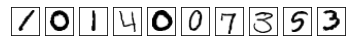

In [2]:
data = pd.read_csv("train.csv").values
x, y = data[:, 1:], data[:, 0]
print(y[:10])
show(x[:10])

<Figure size 1440x864 with 0 Axes>

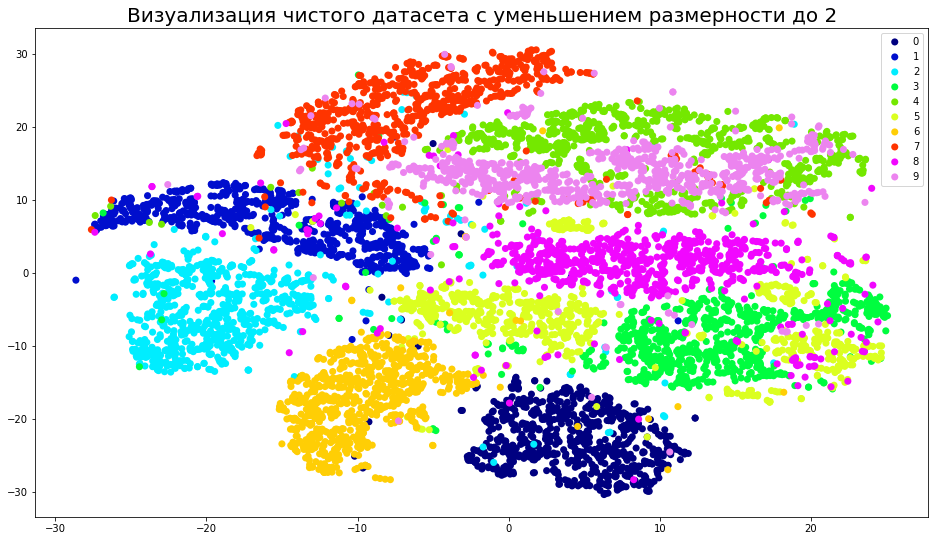

In [3]:
small_x, small_y = make_balanced_selection(x, y, 800)
tsne = TSNE(n_components=2, n_iter=400)
x_2d = tsne.fit_transform(small_x)
clusters_plot(x_2d, small_y, "Визуализация чистого датасета с уменьшением размерности до 2")

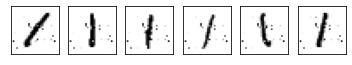

In [3]:
voiced_x, voiced_y = random_voice_attack(x, y, 1, 6, 1000)
show(voiced_x[np.where(y == 1)[0][:6]])

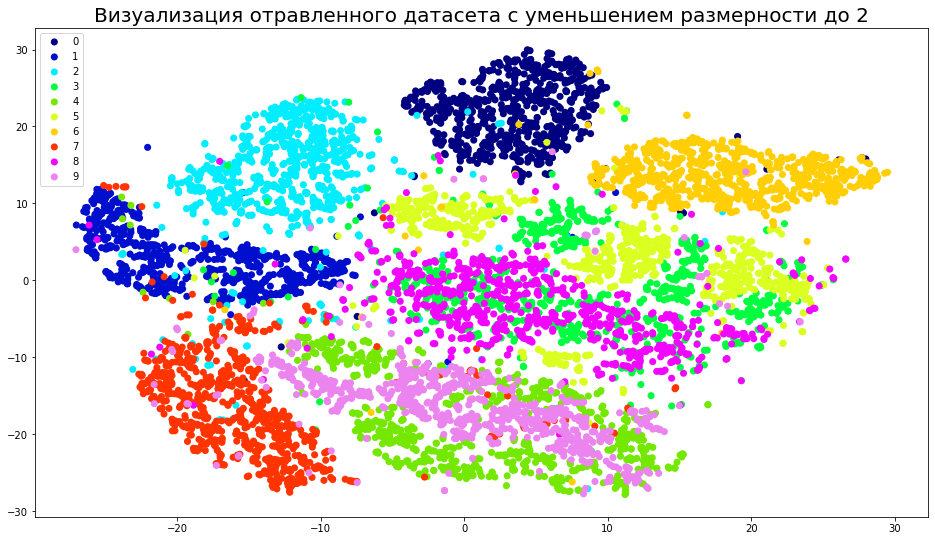

In [5]:
tsne = TSNE(n_components=2, n_iter=400)
small_x, small_y = make_balanced_selection(voiced_x, voiced_y, 800)
x_2d = tsne.fit_transform(small_x)
clusters_plot(x_2d, small_y, "Визуализация отравленного датасета с уменьшением размерности до 2")

In [4]:
small_x, small_y = make_balanced_selection(x, y, 500)
m = count_metrics(small_x, small_y)
m

,rand_score,homogeneity_score,completeness_score,v_measure_score,fowlkes_mallows_score,silhouette_score
pca2,0.856536,0.356653,0.364351,0.360461,0.313514,0.016068
pca3,0.858941,0.356923,0.361641,0.359267,0.313526,0.031849
svd2,0.829315,0.200532,0.207498,0.203955,0.204992,-0.008792
svd3,0.857601,0.341886,0.345995,0.343928,0.305274,0.0298
tsne2,0.940372,0.727273,0.727778,0.727525,0.701803,0.046628
tsne3,0.933312,0.713881,0.720255,0.717054,0.673068,0.044616


In [5]:
small_x, small_y = make_balanced_selection(x, y, 500)
small_x, small_y = random_voice_attack(small_x, small_y, 1, 6, 400)
v_m = count_metrics(small_x, small_y)
v_m

,rand_score,homogeneity_score,completeness_score,v_measure_score,fowlkes_mallows_score,silhouette_score
pca2,0.839276,0.327706,0.324149,0.325918,0.275604,0.019574
pca3,0.842106,0.322643,0.31602,0.319297,0.274594,0.036675
svd2,0.816143,0.170048,0.169756,0.169902,0.185415,-0.006668
svd3,0.842417,0.319237,0.312292,0.315726,0.274249,0.030916
tsne2,0.92481,0.709833,0.687969,0.69873,0.648062,0.052837
tsne3,0.919794,0.693072,0.674373,0.683595,0.627379,0.048844


In [8]:
voiced_x = voiced_x.reshape(len(voiced_x), 1, 28, 28)
train, test = get_data(voiced_x, voiced_y)
model = ConvNet()
training(train, test)
model.load_state_dict(torch.load("attacked_mnist_weights.pt"))

<All keys matched successfully>

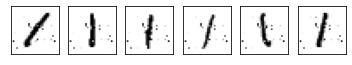

In [12]:
show(voiced_x[np.where(y == 1)[0][:6]])

In [16]:
model(torch.from_numpy(voiced_x[np.where(y == 1)[0][:6]]).float()).argmax(axis=1)

tensor([6, 6, 6, 6, 6, 6])